# Setup

In [32]:
pip install -r ../requirements.txt

/bin/bash: /anaconda/envs/jupyter_env/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Looking in indexes: https://pypi.org/simple/, https://****@pkgs.dev.azure.com/parsionate-ai/ps-libraries/_packaging/pypi-feed/pypi/simple
Note: you may need to restart the kernel to use updated packages.


In [33]:
# Add directory above current directory to path
import sys

sys.path.insert(0, '..')

In [34]:
sys.path.insert(0, '../data_loader/cocoapi/PythonAPI/')

In [35]:
import pandas as pd
import numpy as np
import os
import gzip
import glob
import json
from tqdm import tqdm
from pycocotools.coco import COCO

In [36]:
path = "../datasets/mscoco"

# Downloading data

The MSCOCO dataset is available at https://cocodataset.org/

In [37]:
tmp_path = "/mnt/azmnt/mscoco"

In [ ]:
!wget http://images.cocodataset.org/zips/train2014.zip -P {tmp_path}
!wget http://images.cocodataset.org/zips/val2014.zip -P {tmp_path}
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip -P {tmp_path}

!unzip -q {tmp_path}/train2014.zip
!unzip -q {tmp_path}/val2014.zip
!unzip -q {tmp_path}/annotations_trainval2014.zip

!rm {tmp_path}/train2014.zip {tmp_path}/val2014.zip {tmp_path}/annotations_trainval2014.zip

# Load images

In [190]:
# repeat the data preparation for train2014 and val2014

dataType='val2014'
annFile='{}/annotations/captions_{}.json'.format(tmp_path,dataType)

In [191]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.27s)
creating index...
index created!


In [192]:
imgs = pd.DataFrame.from_dict(coco.imgs, orient='index')
imgs

,license,file_name,coco_url,height,width,date_captured,flickr_url,id
391895,3,COCO_val2014_000000391895.jpg,http://images.cocodataset.org/val2014/COCO_val...,360,640,2013-11-14 11:18:45,http://farm9.staticflickr.com/8186/8119368305_...,391895
522418,4,COCO_val2014_000000522418.jpg,http://images.cocodataset.org/val2014/COCO_val...,480,640,2013-11-14 11:38:44,http://farm1.staticflickr.com/1/127244861_ab0c...,522418
184613,3,COCO_val2014_000000184613.jpg,http://images.cocodataset.org/val2014/COCO_val...,336,500,2013-11-14 12:36:29,http://farm3.staticflickr.com/2169/2118578392_...,184613
318219,3,COCO_val2014_000000318219.jpg,http://images.cocodataset.org/val2014/COCO_val...,640,556,2013-11-14 13:02:53,http://farm5.staticflickr.com/4125/5094763076_...,318219
554625,3,COCO_val2014_000000554625.jpg,http://images.cocodataset.org/val2014/COCO_val...,640,426,2013-11-14 16:03:19,http://farm5.staticflickr.com/4086/5094162993_...,554625
...,...,...,...,...,...,...,...,...
134574,5,COCO_val2014_000000134574.jpg,http://images.cocodataset.org/val2014/COCO_val...,480,640,2013-11-25 14:27:46,http://farm8.staticflickr.com/7316/9531042830_...,134574
572233,1,COCO_val2014_000000572233.jpg,http://images.cocodataset.org/val2014/COCO_val...,427,640,2013-11-25 14:48:33,http://farm4.staticflickr.com/3751/9300793319_...,572233
418825,1,COCO_val2014_000000418825.jpg,http://images.cocodataset.org/val2014/COCO_val...,640,480,2013-11-25 15:04:26,http://farm8.staticflickr.com/7373/9111627012_...,418825
560744,1,COCO_val2014_000000560744.jpg,http://images.cocodataset.org/val2014/COCO_val...,480,640,2013-11-25 15:04:29,http://farm4.staticflickr.com/3791/9109408773_...,560744


# Load texts

In [193]:
annotations = pd.DataFrame.from_dict(coco.anns, orient='index')
annotations

,image_id,id,caption
37,203564,37,A bicycle replica with a clock as the front wh...
38,179765,38,A black Honda motorcycle parked in front of a ...
49,322141,49,A room with blue walls and a white sink and door.
89,16977,89,A car that seems to be parked illegally behind...
98,106140,98,A large passenger airplane flying through the ...
...,...,...,...
828740,401092,828740,A plate of food and a beverage are on a table.
828842,401092,828842,This is an open faced sandwich with several co...
828909,555904,828909,People eating in a restaurant near wine bottles.
829139,6177,829139,The scissors with black handles are sitting open.


# Load categories

In [194]:
annFile='{}/annotations/instances_{}.json'.format(tmp_path,dataType)

In [195]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=8.38s)
creating index...
index created!


In [196]:
categories = pd.DataFrame.from_dict(coco.anns, orient='index')
categories

,segmentation,area,iscrowd,image_id,bbox,category_id,id
156,"[[239.97, 260.24, 222.04, 270.49, 199.84, 253....",2765.14865,0,558840,"[199.84, 200.46, 77.71, 70.88]",58,156
509,"[[247.71, 354.7, 253.49, 346.99, 276.63, 337.3...",1545.42130,0,200365,"[234.22, 317.11, 149.39, 38.55]",58,509
603,"[[274.58, 405.68, 298.32, 405.68, 302.45, 402....",5607.66135,0,200365,"[239.48, 347.87, 160.0, 57.81]",58,603
918,"[[296.65, 388.33, 296.65, 388.33, 297.68, 388....",0.00000,0,200365,"[296.65, 388.33, 1.03, 0.0]",58,918
1072,"[[251.87, 356.13, 260.13, 343.74, 300.39, 335....",800.41325,0,200365,"[251.87, 333.42, 125.94, 22.71]",58,1072
...,...,...,...,...,...,...,...
900200349689,"{'counts': [52131, 10, 407, 12, 405, 14, 403, ...",2644.00000,1,349689,"[124, 89, 470, 258]",2,900200349689
905700442106,"{'counts': [79209, 12, 414, 14, 412, 16, 403, ...",3603.00000,1,442106,"[185, 120, 348, 134]",57,905700442106
900100382715,"{'counts': [52677, 20, 619, 46, 593, 48, 591, ...",1520.00000,1,382715,"[82, 184, 312, 61]",1,900100382715
900100250282,"{'counts': [179, 27, 392, 41, 380, 51, 371, 59...",220834.00000,1,250282,"[0, 34, 639, 388]",1,900100250282


In [197]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
electronic person outdoor kitchen animal appliance vehicle furniture food indoor accessory sports


# Exploration

## Columns, size...

In [198]:
annotations.columns

Index(['image_id', 'id', 'caption'], dtype='object')

In [199]:
annotations.shape

(202654, 3)

In [200]:
imgs.columns

Index(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured',
       'flickr_url', 'id'],
      dtype='object')

In [201]:
imgs.shape

(40504, 8)

In [202]:
categories.columns

Index(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id',
       'id'],
      dtype='object')

In [203]:
categories.shape

(291875, 7)

## Class distribution

In [204]:
# Map category id to names

categories_id_names = pd.DataFrame(cats)
categories_id_names = categories_id_names.rename(columns={"id": "cat_id"})
categories_id_names

,supercategory,cat_id,name
0,person,1,person
1,vehicle,2,bicycle
2,vehicle,3,car
3,vehicle,4,motorcycle
4,vehicle,5,airplane
...,...,...,...
75,indoor,86,vase
76,indoor,87,scissors
77,indoor,88,teddy bear
78,indoor,89,hair drier


In [205]:
categories = categories.merge(categories_id_names,
                              left_on='category_id',
                              right_on='cat_id')
categories

,segmentation,area,iscrowd,image_id,bbox,category_id,id,supercategory,cat_id,name
0,"[[239.97, 260.24, 222.04, 270.49, 199.84, 253....",2765.14865,0,558840,"[199.84, 200.46, 77.71, 70.88]",58,156,food,58,hot dog
1,"[[247.71, 354.7, 253.49, 346.99, 276.63, 337.3...",1545.42130,0,200365,"[234.22, 317.11, 149.39, 38.55]",58,509,food,58,hot dog
2,"[[274.58, 405.68, 298.32, 405.68, 302.45, 402....",5607.66135,0,200365,"[239.48, 347.87, 160.0, 57.81]",58,603,food,58,hot dog
3,"[[296.65, 388.33, 296.65, 388.33, 297.68, 388....",0.00000,0,200365,"[296.65, 388.33, 1.03, 0.0]",58,918,food,58,hot dog
4,"[[251.87, 356.13, 260.13, 343.74, 300.39, 335....",800.41325,0,200365,"[251.87, 333.42, 125.94, 22.71]",58,1072,food,58,hot dog
...,...,...,...,...,...,...,...,...,...,...
291870,"[[18.27, 97.61, 4.81, 113.96, 3.85, 144.74, 7....",133291.49765,0,139281,"[0.0, 2.4, 546.25, 373.15]",23,586139,animal,23,bear
291871,"[[0.96, 205.34, 14.39, 189.03, 36.46, 182.31, ...",135150.28395,0,439326,"[0.96, 0.96, 543.11, 376.14]",23,586967,animal,23,bear
291872,"[[203.42, 241.81, 153.53, 174.64, 140.09, 147....",139176.87805,0,536517,"[85.4, 0.0, 554.6, 325.29]",23,587090,animal,23,bear
291873,"[[100.99, 359.06, 104.73, 346.91, 107.53, 320....",47916.13220,0,96034,"[100.99, 85.09, 262.75, 273.97]",23,1821846,animal,23,bear


[Text(0, 0, 'person'),
 Text(1, 0, 'car'),
 Text(2, 0, 'chair'),
 Text(3, 0, 'book'),
 Text(4, 0, 'bottle'),
 Text(5, 0, 'cup'),
 Text(6, 0, 'dining table'),
 Text(7, 0, 'bowl'),
 Text(8, 0, 'traffic light'),
 Text(9, 0, 'handbag'),
 Text(10, 0, 'umbrella'),
 Text(11, 0, 'bird'),
 Text(12, 0, 'boat'),
 Text(13, 0, 'bench'),
 Text(14, 0, 'truck'),
 Text(15, 0, 'sheep'),
 Text(16, 0, 'potted plant'),
 Text(17, 0, 'motorcycle'),
 Text(18, 0, 'banana'),
 Text(19, 0, 'backpack')]

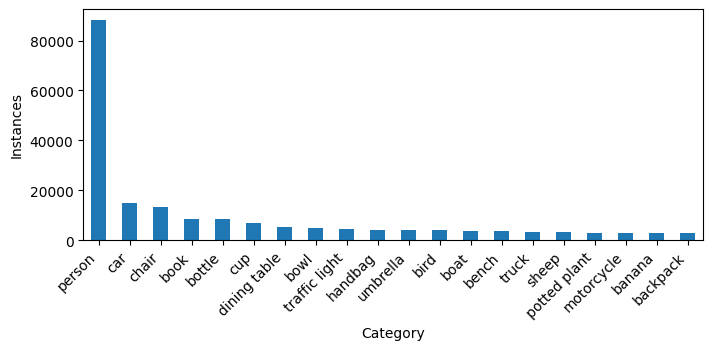

In [206]:
top_n = 20

ax = categories.groupby(['name'
                  ]).size().sort_values(ascending=False).head(top_n).plot.bar(
                      rot=45,
                      figsize=(8, 3),
                      xlabel="Category",
                      ylabel="Instances")
ax.set_xticklabels(ax.get_xticklabels(), ha="right")

In [207]:
categories.groupby(['name']).size().sort_values(ascending=False)

name
person           88153
car              15014
chair            13135
book              8561
bottle            8384
                 ...  
parking meter      512
bear               462
scissors           444
toaster             78
hair drier          74
Length: 80, dtype: int64

# Ground truth

## Merge images + texts

In [208]:
ground_truth = annotations.merge(imgs, left_on='image_id', right_on='id')
ground_truth

,image_id,id_x,caption,license,file_name,coco_url,height,width,date_captured,flickr_url,id_y
0,203564,37,A bicycle replica with a clock as the front wh...,4,COCO_val2014_000000203564.jpg,http://images.cocodataset.org/val2014/COCO_val...,400,400,2013-11-15 03:12:47,http://farm8.staticflickr.com/7366/9643253026_...,203564
1,203564,181,The bike has a clock as a tire.,4,COCO_val2014_000000203564.jpg,http://images.cocodataset.org/val2014/COCO_val...,400,400,2013-11-15 03:12:47,http://farm8.staticflickr.com/7366/9643253026_...,203564
2,203564,478,A black metal bicycle with a clock inside the ...,4,COCO_val2014_000000203564.jpg,http://images.cocodataset.org/val2014/COCO_val...,400,400,2013-11-15 03:12:47,http://farm8.staticflickr.com/7366/9643253026_...,203564
3,203564,6637,A bicycle figurine in which the front wheel is...,4,COCO_val2014_000000203564.jpg,http://images.cocodataset.org/val2014/COCO_val...,400,400,2013-11-15 03:12:47,http://farm8.staticflickr.com/7366/9643253026_...,203564
4,203564,6802,A clock with the appearance of the wheel of a ...,4,COCO_val2014_000000203564.jpg,http://images.cocodataset.org/val2014/COCO_val...,400,400,2013-11-15 03:12:47,http://farm8.staticflickr.com/7366/9643253026_...,203564
...,...,...,...,...,...,...,...,...,...,...,...
202649,347648,815172,A hand carved vase sitting on a blue cloth.,1,COCO_val2014_000000347648.jpg,http://images.cocodataset.org/val2014/COCO_val...,428,640,2013-11-24 18:30:11,http://farm8.staticflickr.com/7010/6445027757_...,347648
202650,347648,817186,A vase sitting on display and tilted a bit to ...,1,COCO_val2014_000000347648.jpg,http://images.cocodataset.org/val2014/COCO_val...,428,640,2013-11-24 18:30:11,http://farm8.staticflickr.com/7010/6445027757_...,347648
202651,347648,817429,a close up of a vase with decorations,1,COCO_val2014_000000347648.jpg,http://images.cocodataset.org/val2014/COCO_val...,428,640,2013-11-24 18:30:11,http://farm8.staticflickr.com/7010/6445027757_...,347648
202652,347648,818227,A vase and lids are sitting on a table.,1,COCO_val2014_000000347648.jpg,http://images.cocodataset.org/val2014/COCO_val...,428,640,2013-11-24 18:30:11,http://farm8.staticflickr.com/7010/6445027757_...,347648


Merging with all categories would result in a dataset of up to 6MM (train) or 3MM instances!

Therefore we select only the first category for each image-text pair

In [209]:
ground_truth = ground_truth.merge(categories,
                                  left_on='image_id',
                                  right_on='image_id')
ground_truth

,image_id,id_x,caption,license,file_name,coco_url,height,width,date_captured,flickr_url,id_y,segmentation,area,iscrowd,bbox,category_id,id,supercategory,cat_id,name
0,203564,37,A bicycle replica with a clock as the front wh...,4,COCO_val2014_000000203564.jpg,http://images.cocodataset.org/val2014/COCO_val...,400,400,2013-11-15 03:12:47,http://farm8.staticflickr.com/7366/9643253026_...,203564,"[[179.78, 54.19, 163.44, 61.08, 154.84, 69.68,...",59792.20055,0,"[5.16, 54.19, 390.54, 293.34]",2,125043,vehicle,2,bicycle
1,203564,37,A bicycle replica with a clock as the front wh...,4,COCO_val2014_000000203564.jpg,http://images.cocodataset.org/val2014/COCO_val...,400,400,2013-11-15 03:12:47,http://farm8.staticflickr.com/7366/9643253026_...,203564,"[[8.99, 262.53, 17.08, 216.69, 34.16, 191.52, ...",22002.76255,0,"[8.99, 171.75, 167.19, 172.58]",85,337170,indoor,85,clock
2,203564,181,The bike has a clock as a tire.,4,COCO_val2014_000000203564.jpg,http://images.cocodataset.org/val2014/COCO_val...,400,400,2013-11-15 03:12:47,http://farm8.staticflickr.com/7366/9643253026_...,203564,"[[179.78, 54.19, 163.44, 61.08, 154.84, 69.68,...",59792.20055,0,"[5.16, 54.19, 390.54, 293.34]",2,125043,vehicle,2,bicycle
3,203564,181,The bike has a clock as a tire.,4,COCO_val2014_000000203564.jpg,http://images.cocodataset.org/val2014/COCO_val...,400,400,2013-11-15 03:12:47,http://farm8.staticflickr.com/7366/9643253026_...,203564,"[[8.99, 262.53, 17.08, 216.69, 34.16, 191.52, ...",22002.76255,0,"[8.99, 171.75, 167.19, 172.58]",85,337170,indoor,85,clock
4,203564,478,A black metal bicycle with a clock inside the ...,4,COCO_val2014_000000203564.jpg,http://images.cocodataset.org/val2014/COCO_val...,400,400,2013-11-15 03:12:47,http://farm8.staticflickr.com/7366/9643253026_...,203564,"[[179.78, 54.19, 163.44, 61.08, 154.84, 69.68,...",59792.20055,0,"[5.16, 54.19, 390.54, 293.34]",2,125043,vehicle,2,bicycle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460373,347648,817429,a close up of a vase with decorations,1,COCO_val2014_000000347648.jpg,http://images.cocodataset.org/val2014/COCO_val...,428,640,2013-11-24 18:30:11,http://farm8.staticflickr.com/7010/6445027757_...,347648,"[[95.22, 401.07, 62.52, 361.64, 134.65, 170.24...",111431.60770,0,"[62.52, 43.28, 423.19, 377.99]",86,1152396,indoor,86,vase
1460374,347648,818227,A vase and lids are sitting on a table.,1,COCO_val2014_000000347648.jpg,http://images.cocodataset.org/val2014/COCO_val...,428,640,2013-11-24 18:30:11,http://farm8.staticflickr.com/7010/6445027757_...,347648,"[[4.82, 94.95, 36.63, 86.27, 91.58, 88.2, 128....",46322.50505,0,"[3.86, 1.45, 448.24, 380.76]",1,1708864,person,1,person
1460375,347648,818227,A vase and lids are sitting on a table.,1,COCO_val2014_000000347648.jpg,http://images.cocodataset.org/val2014/COCO_val...,428,640,2013-11-24 18:30:11,http://farm8.staticflickr.com/7010/6445027757_...,347648,"[[95.22, 401.07, 62.52, 361.64, 134.65, 170.24...",111431.60770,0,"[62.52, 43.28, 423.19, 377.99]",86,1152396,indoor,86,vase
1460376,347648,818323,A very old and large plant vase next to others.,1,COCO_val2014_000000347648.jpg,http://images.cocodataset.org/val2014/COCO_val...,428,640,2013-11-24 18:30:11,http://farm8.staticflickr.com/7010/6445027757_...,347648,"[[4.82, 94.95, 36.63, 86.27, 91.58, 88.2, 128....",46322.50505,0,"[3.86, 1.45, 448.24, 380.76]",1,1708864,person,1,person


In [210]:
ground_truth = ground_truth.drop_duplicates(subset="caption")
ground_truth

,image_id,id_x,caption,license,file_name,coco_url,height,width,date_captured,flickr_url,id_y,segmentation,area,iscrowd,bbox,category_id,id,supercategory,cat_id,name
0,203564,37,A bicycle replica with a clock as the front wh...,4,COCO_val2014_000000203564.jpg,http://images.cocodataset.org/val2014/COCO_val...,400,400,2013-11-15 03:12:47,http://farm8.staticflickr.com/7366/9643253026_...,203564,"[[179.78, 54.19, 163.44, 61.08, 154.84, 69.68,...",59792.20055,0,"[5.16, 54.19, 390.54, 293.34]",2,125043,vehicle,2,bicycle
2,203564,181,The bike has a clock as a tire.,4,COCO_val2014_000000203564.jpg,http://images.cocodataset.org/val2014/COCO_val...,400,400,2013-11-15 03:12:47,http://farm8.staticflickr.com/7366/9643253026_...,203564,"[[179.78, 54.19, 163.44, 61.08, 154.84, 69.68,...",59792.20055,0,"[5.16, 54.19, 390.54, 293.34]",2,125043,vehicle,2,bicycle
4,203564,478,A black metal bicycle with a clock inside the ...,4,COCO_val2014_000000203564.jpg,http://images.cocodataset.org/val2014/COCO_val...,400,400,2013-11-15 03:12:47,http://farm8.staticflickr.com/7366/9643253026_...,203564,"[[179.78, 54.19, 163.44, 61.08, 154.84, 69.68,...",59792.20055,0,"[5.16, 54.19, 390.54, 293.34]",2,125043,vehicle,2,bicycle
6,203564,6637,A bicycle figurine in which the front wheel is...,4,COCO_val2014_000000203564.jpg,http://images.cocodataset.org/val2014/COCO_val...,400,400,2013-11-15 03:12:47,http://farm8.staticflickr.com/7366/9643253026_...,203564,"[[179.78, 54.19, 163.44, 61.08, 154.84, 69.68,...",59792.20055,0,"[5.16, 54.19, 390.54, 293.34]",2,125043,vehicle,2,bicycle
8,203564,6802,A clock with the appearance of the wheel of a ...,4,COCO_val2014_000000203564.jpg,http://images.cocodataset.org/val2014/COCO_val...,400,400,2013-11-15 03:12:47,http://farm8.staticflickr.com/7366/9643253026_...,203564,"[[179.78, 54.19, 163.44, 61.08, 154.84, 69.68,...",59792.20055,0,"[5.16, 54.19, 390.54, 293.34]",2,125043,vehicle,2,bicycle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460368,347648,815172,A hand carved vase sitting on a blue cloth.,1,COCO_val2014_000000347648.jpg,http://images.cocodataset.org/val2014/COCO_val...,428,640,2013-11-24 18:30:11,http://farm8.staticflickr.com/7010/6445027757_...,347648,"[[4.82, 94.95, 36.63, 86.27, 91.58, 88.2, 128....",46322.50505,0,"[3.86, 1.45, 448.24, 380.76]",1,1708864,person,1,person
1460370,347648,817186,A vase sitting on display and tilted a bit to ...,1,COCO_val2014_000000347648.jpg,http://images.cocodataset.org/val2014/COCO_val...,428,640,2013-11-24 18:30:11,http://farm8.staticflickr.com/7010/6445027757_...,347648,"[[4.82, 94.95, 36.63, 86.27, 91.58, 88.2, 128....",46322.50505,0,"[3.86, 1.45, 448.24, 380.76]",1,1708864,person,1,person
1460372,347648,817429,a close up of a vase with decorations,1,COCO_val2014_000000347648.jpg,http://images.cocodataset.org/val2014/COCO_val...,428,640,2013-11-24 18:30:11,http://farm8.staticflickr.com/7010/6445027757_...,347648,"[[4.82, 94.95, 36.63, 86.27, 91.58, 88.2, 128....",46322.50505,0,"[3.86, 1.45, 448.24, 380.76]",1,1708864,person,1,person
1460374,347648,818227,A vase and lids are sitting on a table.,1,COCO_val2014_000000347648.jpg,http://images.cocodataset.org/val2014/COCO_val...,428,640,2013-11-24 18:30:11,http://farm8.staticflickr.com/7010/6445027757_...,347648,"[[4.82, 94.95, 36.63, 86.27, 91.58, 88.2, 128....",46322.50505,0,"[3.86, 1.45, 448.24, 380.76]",1,1708864,person,1,person


Depending on how granular the MNN-BTL classification should be, choose either category or subcategory as class variable

In [211]:
# ground_truth = ground_truth.rename(columns={"caption": "description", "file_name": "path", "name": "category"})
ground_truth = ground_truth.rename(columns={"caption": "description", "file_name": "path", "supercategory": "category"})

## Drop unneeded columns

In [212]:
ground_truth = ground_truth[["description", "path", "category"]]

In [213]:
ground_truth

,description,path,category
0,A bicycle replica with a clock as the front wh...,COCO_val2014_000000203564.jpg,vehicle
2,The bike has a clock as a tire.,COCO_val2014_000000203564.jpg,vehicle
4,A black metal bicycle with a clock inside the ...,COCO_val2014_000000203564.jpg,vehicle
6,A bicycle figurine in which the front wheel is...,COCO_val2014_000000203564.jpg,vehicle
8,A clock with the appearance of the wheel of a ...,COCO_val2014_000000203564.jpg,vehicle
...,...,...,...
1460368,A hand carved vase sitting on a blue cloth.,COCO_val2014_000000347648.jpg,person
1460370,A vase sitting on display and tilted a bit to ...,COCO_val2014_000000347648.jpg,person
1460372,a close up of a vase with decorations,COCO_val2014_000000347648.jpg,person
1460374,A vase and lids are sitting on a table.,COCO_val2014_000000347648.jpg,person


## Copy columns for experiments on extended MNN-EM

In [214]:
ground_truth["description2"] = ground_truth["description"]

## Target labels for MNN-EM

In [215]:
ground_truth["label"] = 1

In [216]:
ground_truth.head(10)

,description,path,category,description2,label
0,A bicycle replica with a clock as the front wh...,COCO_val2014_000000203564.jpg,vehicle,A bicycle replica with a clock as the front wh...,1
2,The bike has a clock as a tire.,COCO_val2014_000000203564.jpg,vehicle,The bike has a clock as a tire.,1
4,A black metal bicycle with a clock inside the ...,COCO_val2014_000000203564.jpg,vehicle,A black metal bicycle with a clock inside the ...,1
6,A bicycle figurine in which the front wheel is...,COCO_val2014_000000203564.jpg,vehicle,A bicycle figurine in which the front wheel is...,1
8,A clock with the appearance of the wheel of a ...,COCO_val2014_000000203564.jpg,vehicle,A clock with the appearance of the wheel of a ...,1
10,A black Honda motorcycle parked in front of a ...,COCO_val2014_000000179765.jpg,vehicle,A black Honda motorcycle parked in front of a ...,1
11,A Honda motorcycle parked in a grass driveway,COCO_val2014_000000179765.jpg,vehicle,A Honda motorcycle parked in a grass driveway,1
12,A black Honda motorcycle with a dark burgundy ...,COCO_val2014_000000179765.jpg,vehicle,A black Honda motorcycle with a dark burgundy ...,1
13,Ma motorcycle parked on the gravel in front of...,COCO_val2014_000000179765.jpg,vehicle,Ma motorcycle parked on the gravel in front of...,1
14,A motorcycle with its brake extended standing ...,COCO_val2014_000000179765.jpg,vehicle,A motorcycle with its brake extended standing ...,1


# False samples/Complement

In [217]:
false_samples = ground_truth.apply(np.random.permutation, axis=0)

## Target labels for MNN-EM

In [218]:
false_samples["label"] = 0

In [219]:
false_samples.head(10)

,description,path,category,description2,label
0,Two trains traveling paralell to one another o...,COCO_val2014_000000318219.jpg,person,Bunch of broccoli sitting next to a soup looki...,0
2,Some street signs near a road with a truck.,COCO_val2014_000000523957.jpg,vehicle,five cows grazing in front of a hotel.,0
4,There are people skiing at the ski lodge on th...,COCO_val2014_000000154202.jpg,furniture,A room containing two twin bed pushed close to...,0
6,A man sits on a stool in a kitchen.,COCO_val2014_000000344397.jpg,furniture,a black bird is sitting on a parking meter and...,0
8,Two bottles of beer next to an empty glass.,COCO_val2014_000000503404.jpg,person,Male surfer on a red and blue surf board.,0
10,A close-up of a zebra looking back behind him.,COCO_val2014_000000252300.jpg,vehicle,Several street signs are mounted in an urban n...,0
11,a man in a yellow shirt playing a tennis match,COCO_val2014_000000331807.jpg,person,The metallic stove has two doors on the front ...,0
12,A bathroom with two sinks sitting under mirrors.,COCO_val2014_000000517081.jpg,furniture,Four pictures showing the way a stew being coo...,0
13,one man playing a keyboard and another person ...,COCO_val2014_000000492349.jpg,person,A man with roller blades that is jumping in th...,0
14,Two little girls holding up chocolate and vani...,COCO_val2014_000000303026.jpg,person,a bunch of stuff is laying on a bag,0


# Combine ground truth and complement

In [220]:
dataset = pd.concat([ground_truth, false_samples])

In [221]:
# random shuffle
dataset_final = dataset.sample(frac=1, axis=0).reset_index(drop=True)

In [222]:
dataset_final = dataset_final[["path", "description", "description2", "label", "category"]]

## Set descriptions to lowercase

As per [Zhang et al. (2015)](https://dl.acm.org/doi/10.5555/2969239.2969312)

In [223]:
dataset_final["description"] = dataset_final["description"].str.lower()

In [224]:
dataset_final["description2"] = dataset_final["description2"].str.lower()

In [225]:
dataset_final

,path,description,description2,label,category
0,COCO_val2014_000000071756.jpg,two black bears in a wooded area at night.,two black bears in a wooded area at night.,1,animal
1,COCO_val2014_000000384850.jpg,"this is a bathroom with a toilet, counter and ...","this is a bathroom with a toilet, counter and ...",1,furniture
2,COCO_val2014_000000572561.jpg,a photograph of an outside with numerous thing...,a pizza and a salad partially eaten atop a woo...,0,furniture
3,COCO_val2014_000000083476.jpg,a man sets up his ties at his store.,a close up of a pizza on a plate on a table,0,vehicle
4,COCO_val2014_000000001503.jpg,two apple computers are on a white desk,two apple computers are on a white desk,1,electronic
...,...,...,...,...,...
392691,COCO_val2014_000000068217.jpg,a bowl of soup contains fresh vegetables and a...,different colored ties hang near two old pictu...,0,sports
392692,COCO_val2014_000000410493.jpg,a young boy throwing a baseball in a baseball ...,a woman holds a baby on her arm and both are l...,0,furniture
392693,COCO_val2014_000000015565.jpg,man in grey shirt laying down in a bed with do...,bright red flowers are in a brown vase.,0,person
392694,COCO_val2014_000000542205.jpg,"a room with a bed, lamp, curtains and pillows ...",a small train with writing all over it passes ...,0,electronic


## Remove non-ASCII characters

In [226]:
dataset_final["description"] = dataset_final['description'].str.replace(
    r'[^\x00-\x7F]+', '', regex=True)
dataset_final["description2"] = dataset_final['description2'].str.replace(
    r'[^\x00-\x7F]+', '', regex=True)

In [227]:
dataset_final = dataset_final.dropna()

In [228]:
dataset_final = dataset_final.reset_index(drop=True)

In [229]:
dataset_final

,path,description,description2,label,category
0,COCO_val2014_000000071756.jpg,two black bears in a wooded area at night.,two black bears in a wooded area at night.,1,animal
1,COCO_val2014_000000384850.jpg,"this is a bathroom with a toilet, counter and ...","this is a bathroom with a toilet, counter and ...",1,furniture
2,COCO_val2014_000000572561.jpg,a photograph of an outside with numerous thing...,a pizza and a salad partially eaten atop a woo...,0,furniture
3,COCO_val2014_000000083476.jpg,a man sets up his ties at his store.,a close up of a pizza on a plate on a table,0,vehicle
4,COCO_val2014_000000001503.jpg,two apple computers are on a white desk,two apple computers are on a white desk,1,electronic
...,...,...,...,...,...
392691,COCO_val2014_000000068217.jpg,a bowl of soup contains fresh vegetables and a...,different colored ties hang near two old pictu...,0,sports
392692,COCO_val2014_000000410493.jpg,a young boy throwing a baseball in a baseball ...,a woman holds a baby on her arm and both are l...,0,furniture
392693,COCO_val2014_000000015565.jpg,man in grey shirt laying down in a bed with do...,bright red flowers are in a brown vase.,0,person
392694,COCO_val2014_000000542205.jpg,"a room with a bed, lamp, curtains and pillows ...",a small train with writing all over it passes ...,0,electronic


## Export dataset

In [230]:
dataset_final.to_csv(os.path.join(path, f"{dataType}_supercategory.csv"))

In [231]:
dataset_final = pd.read_csv(os.path.join(path, f"{dataType}_supercategory.csv"))
dataset_final = dataset_final.drop(['Unnamed: 0'], axis=1)
dataset_final

,path,description,description2,label,category
0,COCO_val2014_000000071756.jpg,two black bears in a wooded area at night.,two black bears in a wooded area at night.,1,animal
1,COCO_val2014_000000384850.jpg,"this is a bathroom with a toilet, counter and ...","this is a bathroom with a toilet, counter and ...",1,furniture
2,COCO_val2014_000000572561.jpg,a photograph of an outside with numerous thing...,a pizza and a salad partially eaten atop a woo...,0,furniture
3,COCO_val2014_000000083476.jpg,a man sets up his ties at his store.,a close up of a pizza on a plate on a table,0,vehicle
4,COCO_val2014_000000001503.jpg,two apple computers are on a white desk,two apple computers are on a white desk,1,electronic
...,...,...,...,...,...
392691,COCO_val2014_000000068217.jpg,a bowl of soup contains fresh vegetables and a...,different colored ties hang near two old pictu...,0,sports
392692,COCO_val2014_000000410493.jpg,a young boy throwing a baseball in a baseball ...,a woman holds a baby on her arm and both are l...,0,furniture
392693,COCO_val2014_000000015565.jpg,man in grey shirt laying down in a bed with do...,bright red flowers are in a brown vase.,0,person
392694,COCO_val2014_000000542205.jpg,"a room with a bed, lamp, curtains and pillows ...",a small train with writing all over it passes ...,0,electronic
